#### Question 1. How are the coefficients  affected when we increase the Hyper Parameter (Lambda), what effect wiill be on coefficients?
#### Answer 1. They generally decrease, but never 0, always tends toward 0.

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

In [4]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
df.shape

(442, 11)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=46)

In [7]:
from sklearn.linear_model import Ridge
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,Y_train)

    coefs.append(reg.coef_.tolist())
    Y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(Y_test,Y_pred))

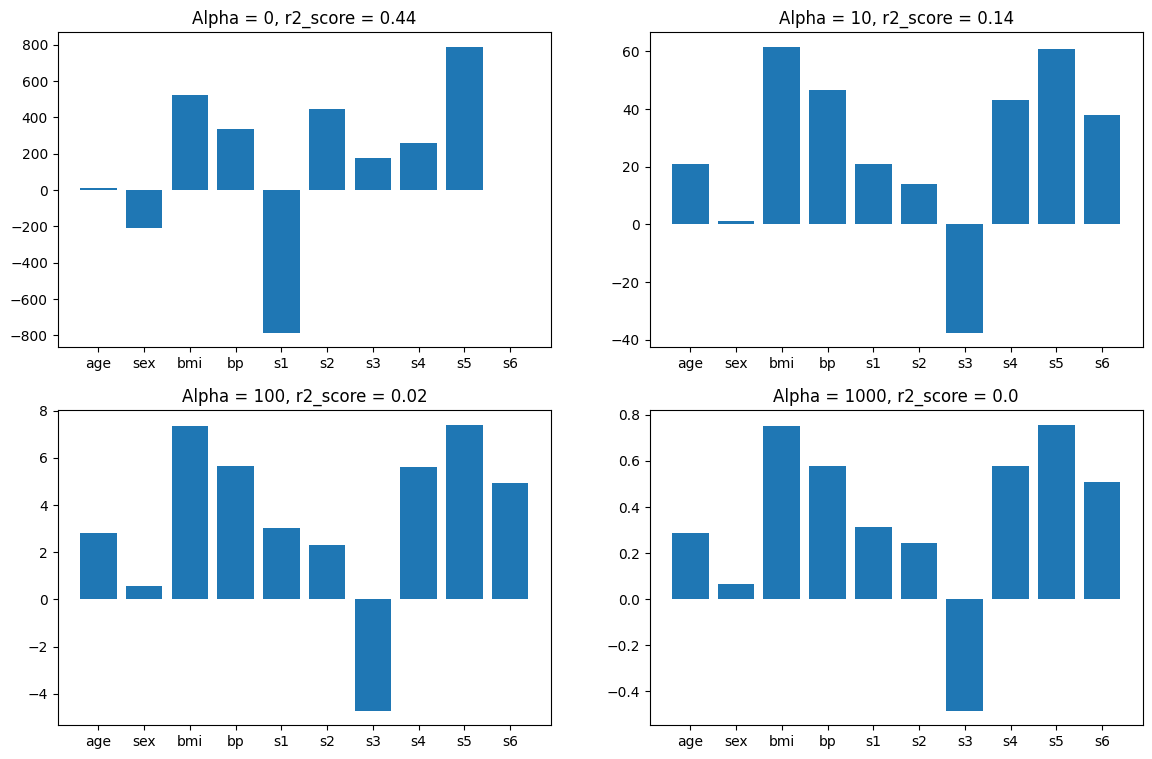

In [8]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100, r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000, r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

#### Question 2. What does the coefficients with higher value behave on increasing hyperparameter(lambda)?
#### Answer 2: It reduces/shrink faster, higher the coefficient higher it will shrink.


In [9]:
alpha = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alpha:
    reg = Ridge(alpha=i)
    reg.fit(X_train,Y_train)

    coefs.append(reg.coef_.tolist())

In [10]:
input_array = np.array(coefs)

In [11]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df
coef_df['alpha'] = alpha
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,13.566912,-210.613526,521.704437,335.877974,-786.143093,445.357851,177.438991,257.841824,789.195708,-0.105678
0.0001,13.589711,-210.555260,521.729422,335.734663,-773.578374,435.479769,171.817146,256.200325,784.540686,-0.012600
0.0010,13.781228,-210.062508,521.846877,334.587996,-676.398944,359.155988,128.320200,243.462814,748.465469,0.762540
0.0100,15.174312,-206.339787,519.053153,328.515490,-301.483471,67.866545,-40.007602,192.768339,606.152233,6.094801
0.1000,24.554986,-178.742048,474.727201,302.148496,-44.134940,-96.510361,-153.305272,149.448350,465.773378,36.975148
1.0000,48.422359,-60.144420,271.379419,186.460436,27.114876,-18.587001,-128.506047,122.342270,255.060855,94.524294
10.0000,21.050978,1.137173,61.690444,46.486384,21.096906,14.138838,-37.666460,43.009869,61.028173,37.858846
100.0000,2.798467,0.579721,7.349697,5.654192,3.020003,2.296499,-4.722272,5.612215,7.403599,4.948168
1000.0000,0.289023,0.064397,0.750111,0.578419,0.314342,0.241743,-0.484691,0.578612,0.757249,0.510098


In [12]:
alpha = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alpha:
    reg = Ridge(alpha=i)
    reg.fit(X_train,Y_train)

    coefs.append(reg.coef_.tolist())

In [13]:
input_array = np.array(coefs).T

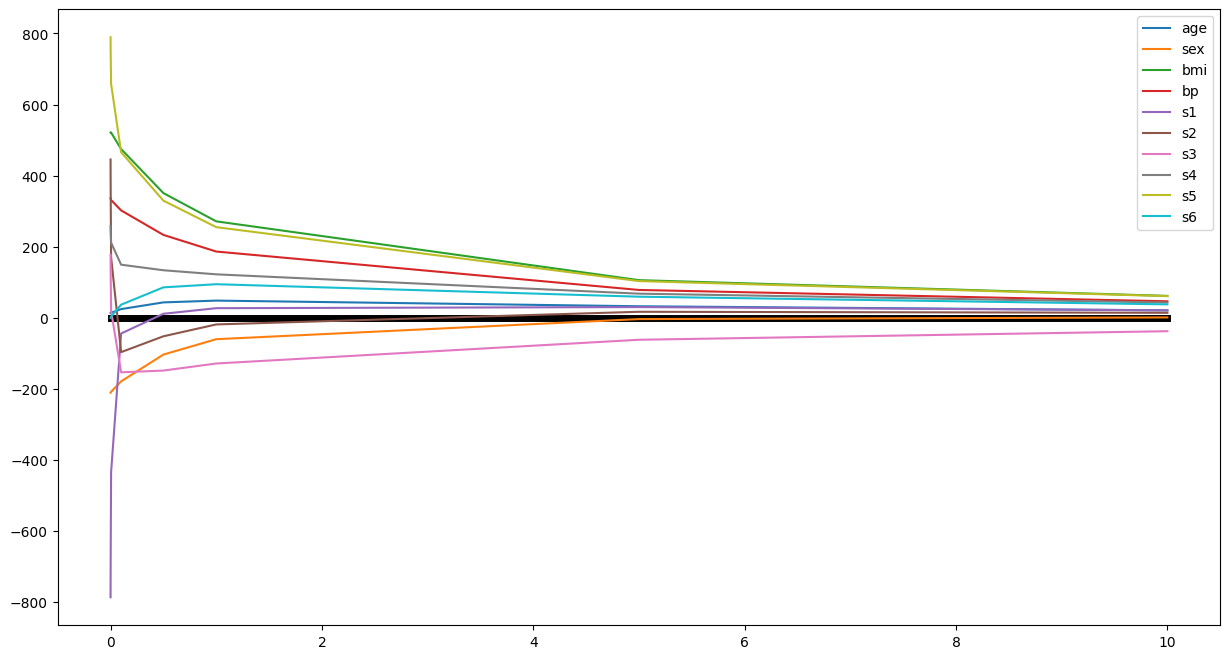

In [14]:
plt.figure(figsize=(15,8))
plt.plot(alpha,np.zeros(len(alpha)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alpha,input_array[i],label=data.feature_names[i])
plt.legend()
plt.show()


#### Question 3: How Regularization impact the Bias and Varience.
#### Answer 3: 
#### Lower value of Lambda lead to high varience and low bias overfitting
#### Higher Value of lambda lead to high bias and low varience , underfitting

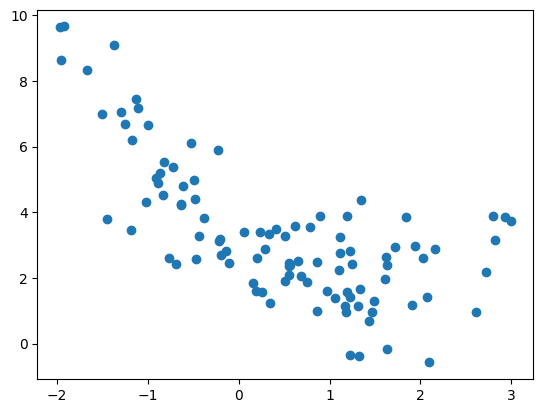

In [15]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)


In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [18]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

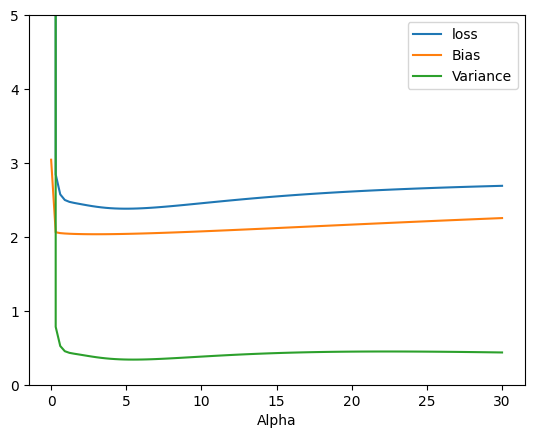

In [19]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

#### Question 4 : How does Regularization effect loss function?


[27.82809103]
-2.29474455867698


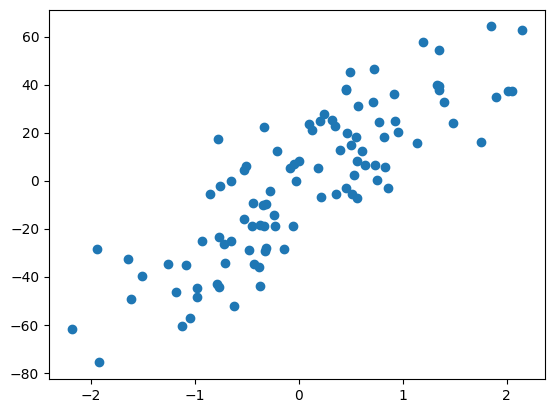

In [20]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [21]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m
def predict(m):
    return m*X - 2.29

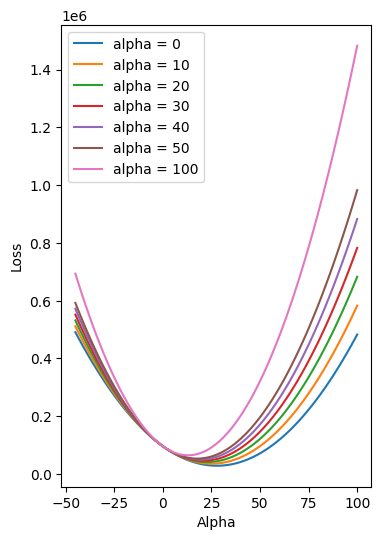

In [22]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()